# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Assem Sherif

ID: 52-1732

Tutorial: 3

---

Name: Youssef Ashraf

ID: 52-0635

Tutorial: 3


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-1-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df['body'].unique()

array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
df['body'] = df['body'].replace({
    'X': 'Sedan',
    'sedan': 'Sedan',
    'suv': 'SUV',
    'convertible': 'Convertible',
    'wagon': 'Wagon',
    'coupe': 'Coupe',
    'minivan': 'Minivan',
    'pickup truck': 'Pickup Truck',
    'hatchback': 'Hatchback',
    'E-Series Van': 'Minivan',
    'G Sedan': 'Sedan',
    'van': 'Minivan',
    'Van': 'Minivan',
    'g sedan': 'Sedan',
    'G Convertible': 'Convertible',
    'G Coupe': 'Coupe',
    'g coupe': 'Coupe',
    'Genesis Coupe': 'Coupe',
    'e-series van': 'Minivan',
    'G37 Convertible': 'Convertible',
    'genesis coupe': 'Coupe',
    'promaster cargo van': 'Minivan',
    'Koup': 'Coupe',
    'Elantra Coupe': 'Coupe',
    'Q60 Convertible': 'Coupe',
    'Promaster Cargo Van': 'Minivan',
    'CTS Coupe': 'Coupe',
    'CTS Wagon': 'Wagon',
    'GranTurismo Convertible': 'Convertible',
    'beetle convertible': 'Convertible',
    'TSX Sport Wagon': 'Wagon',
    'g convertible': 'Convertible',
    'tSX sport wagon': 'Wagon',
    'CTS-V Coupe': 'Coupe',
    'Q60 Coupe': 'Coupe',
    'granturismo convertible': 'Convertible',
    'cts coupe': 'Coupe',
    'Transit Van': 'Minivan',
    'Crew Cab': 'Pickup Truck',
    'Regular Cab': 'Pickup Truck',
    'Double Cab': 'Pickup Truck',
    'Extended Cab': 'Pickup Truck',
    'SuperCab': 'Pickup Truck',
    'king cab': 'Pickup Truck',
    'King Cab': 'Pickup Truck',
    'extended cab': 'Pickup Truck',
    'quad cab': 'Pickup Truck',
    'supercab': 'Pickup Truck',
    'Quad Cab': 'Pickup Truck',
    'crew cab': 'Pickup Truck',
    'supercrew': 'Pickup Truck',
    'CrewMax Cab': 'Pickup Truck',
    'double cab': 'Pickup Truck',
    'Club Cab': 'Pickup Truck',
    'Access Cab': 'Pickup Truck',
    'Cab Plus 4': 'Pickup Truck',
    'crewmax cab': 'Pickup Truck',
    'access cab': 'Pickup Truck',
    'Mega Cab': 'Pickup Truck',
    'regular cab': 'Pickup Truck',
    'mega cab': 'Pickup Truck',
    'regular-cab': 'Pickup Truck',
    'Xtracab': 'Pickup Truck',
    'xtracab': 'Pickup Truck',
    'Express Cargo': 'Minivan',
    'SuperCrew':'Pickup Truck',
    'Beetle Convertible': 'Convertible',
    'tsx sport wagon': 'Wagon'
})

df['odometer'] = df['odometer'].str.replace(r'\D', '', regex=True).astype(int)

df['sellingprice'] = df['sellingprice'].replace('[\$,]', '', regex=True).astype(int)
df['mmr'] = df['mmr'].replace('[\$,]', '', regex=True).astype(int)
mode=df['color'].mode().iloc[0]
mode1=df['interior'].mode().iloc[0]
df['color'] = df['color'].str.replace('—', mode)
df['interior'] = df['interior'].str.replace('—', mode1)
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,504040,black,gray,the hertz corporation,11000,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,178460,gray,black,award auto sales and leasing inc,28700,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,211220,silver,black,lexus financial services,22200,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,1453030,black,black,peddle llc,3675,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,67140,white,gray,u-haul,22500,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,528440,black,gray,wheels exchange llc,15650,17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,jn1cv6ap9cm623162,ca,4.5,231850,black,black,nissan infiniti lt,19350,21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,453570,white,beige,motorcars of south texas,22200,22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,433760,black,beige,avis rac/san leandro,13400,13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


In [ ]:
df['body'].unique()

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

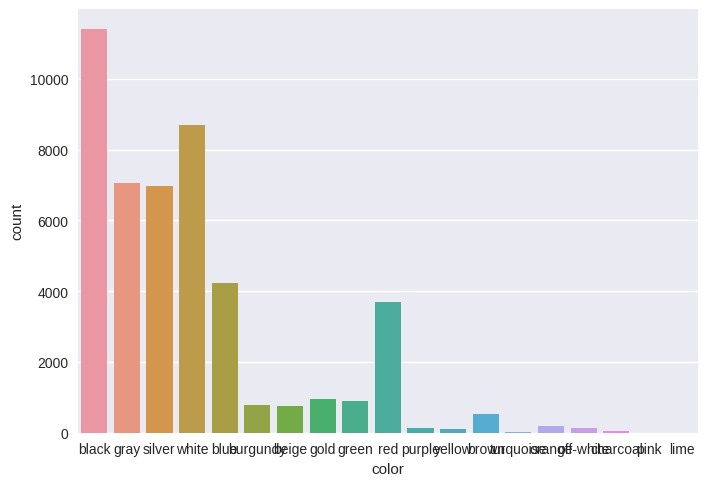

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

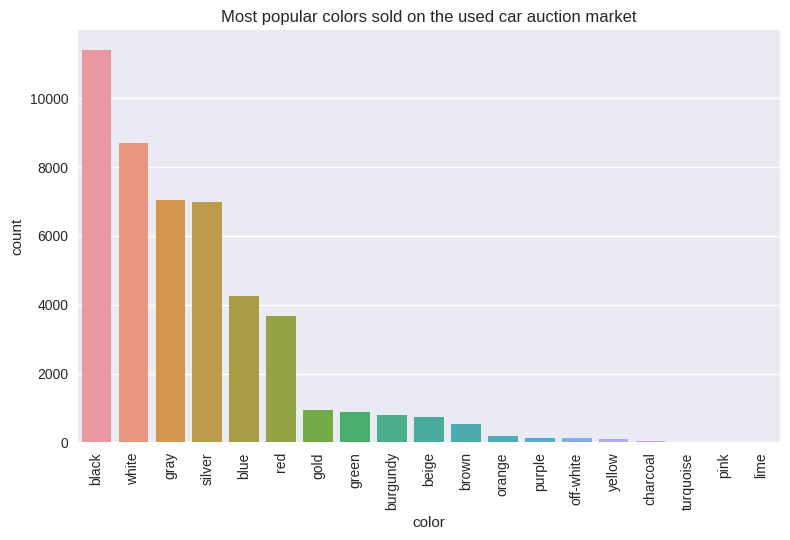

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

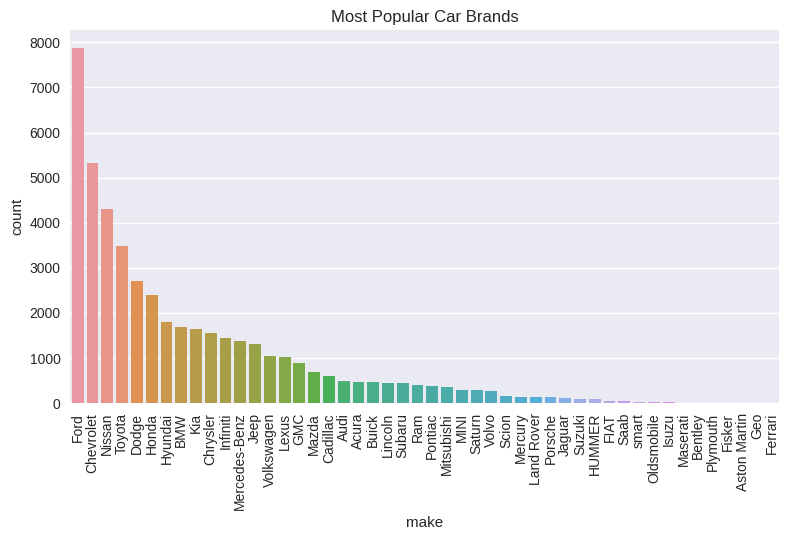

In [ ]:
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most Popular Car Brands')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford, Chevrolet and Nissan

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

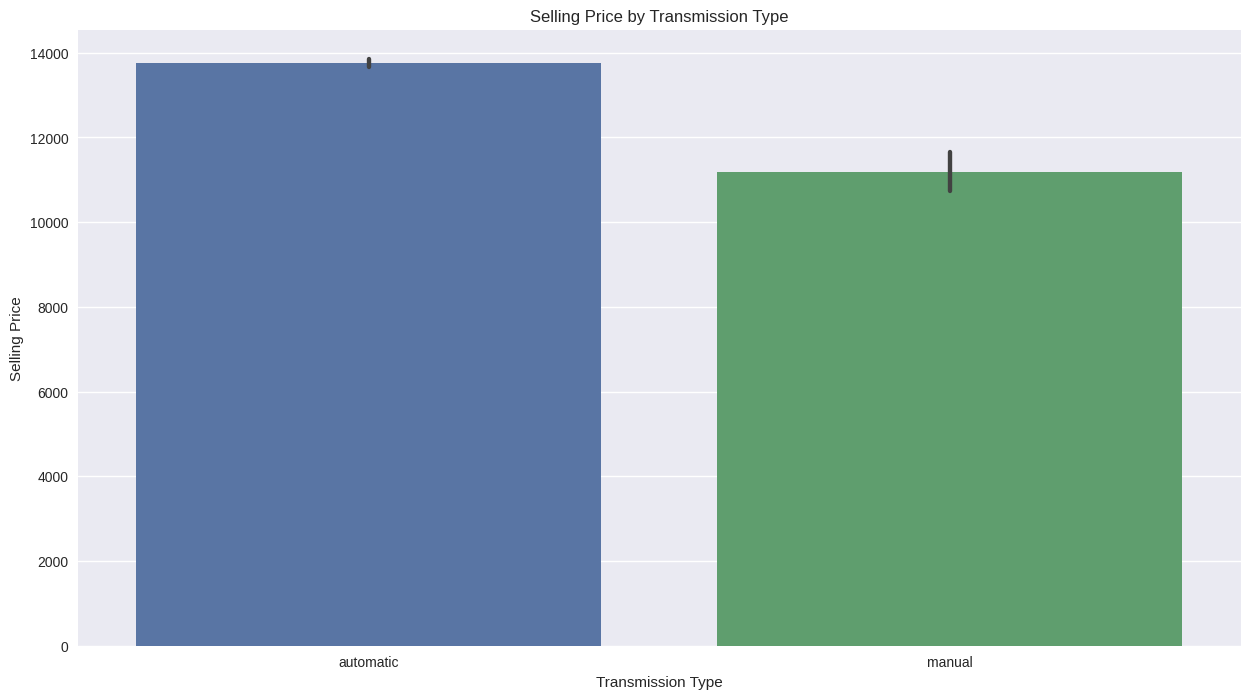

Automatic cars on average sell for a higher price than manual cars.
Mean Selling Price for Automatic Cars: $13761.08
Mean Selling Price for Manual Cars: $11181.78


In [ ]:
plt.figure(figsize=(15, 8))
sns.barplot(x='transmission', y='sellingprice', data=df)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()
mean_automatic_price = df[df['transmission'] == 'automatic']['sellingprice'].mean()
mean_manual_price = df[df['transmission'] == 'manual']['sellingprice'].mean()
if mean_automatic_price > mean_manual_price:
    print("Automatic cars on average sell for a higher price than manual cars.")
    print("Mean Selling Price for Automatic Cars: ${:.2f}".format(mean_automatic_price))
    print("Mean Selling Price for Manual Cars: ${:.2f}".format(mean_manual_price))
elif mean_automatic_price < mean_manual_price:
    print("Manual cars on average sell for a higher price than automatic cars.")
    print("Mean Selling Price for Manual Cars: ${:.2f}".format(mean_manual_price))
else:
    print("Automatic and manual cars have the same average selling price.")

**Answer for Q2**: As shown in the barplot here automatic cars do sell for a higher price when compared to manual cars. Moreover, the calculations we've made show that the mean selling price for automatic cars is higher than the mean selling price for Manual cars.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

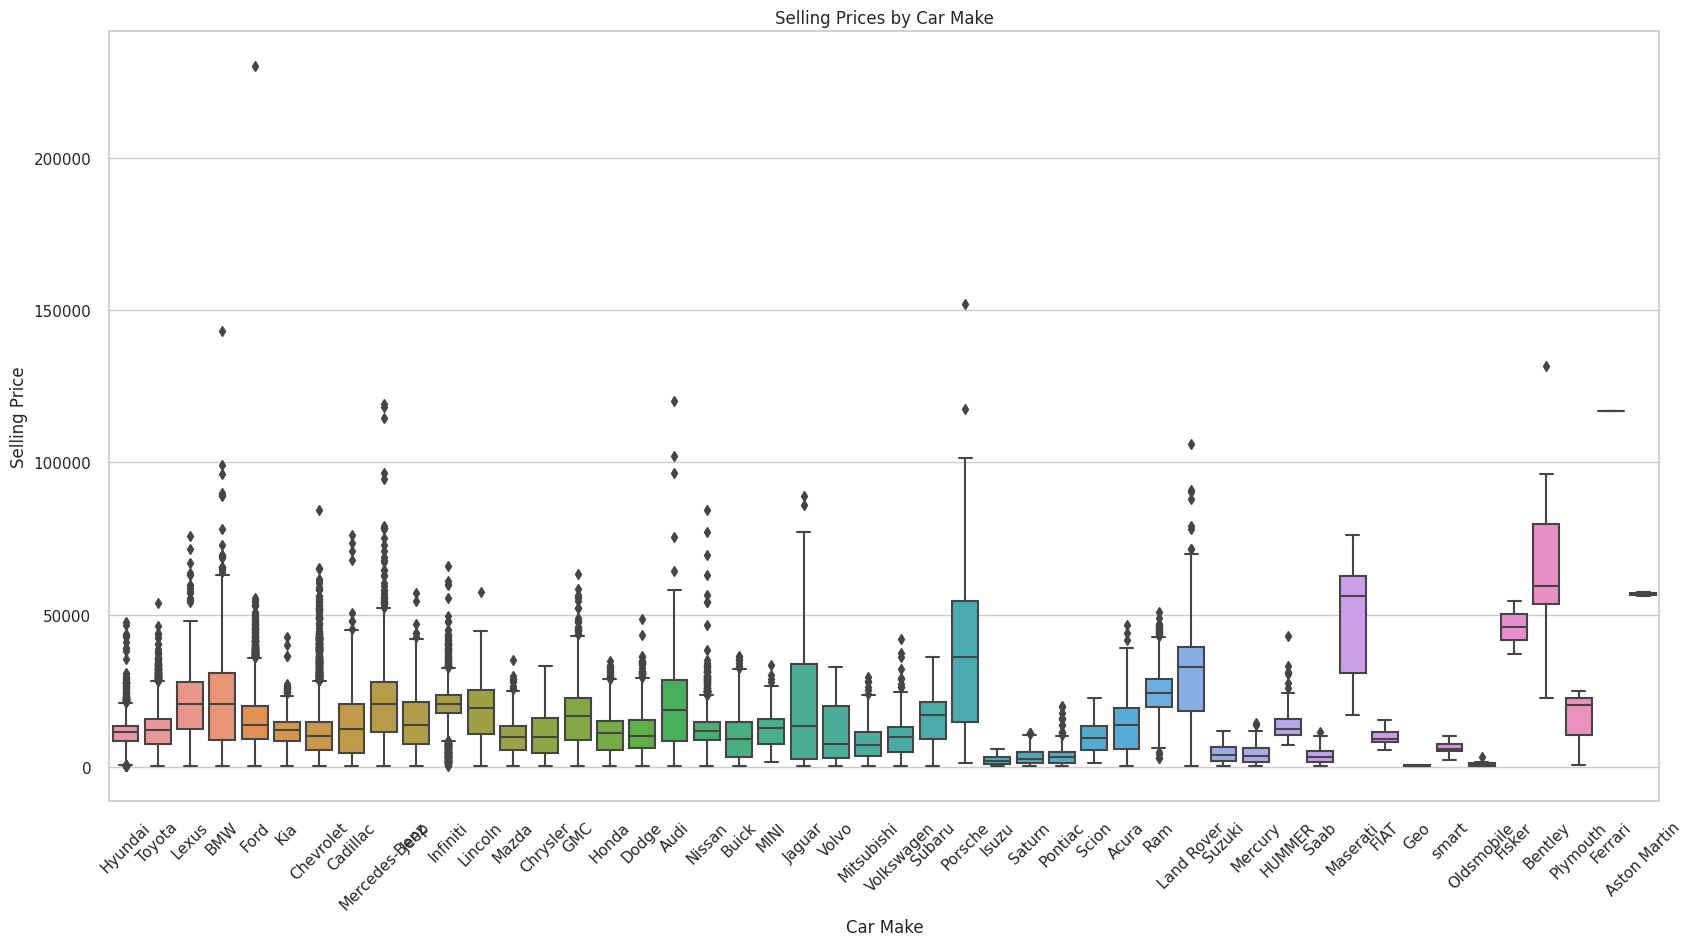

Car makes with the widest distribution of selling price:
make
Bentley    33522.827377
Porsche    26717.778089
Name: sellingprice, dtype: float64
Most expensive car makes:
make
Ford       230000
Porsche    152000
Name: sellingprice, dtype: int64


In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")
sns.boxplot(x="make", y="sellingprice", data=df)
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.title('Selling Prices by Car Make')
plt.xticks(rotation=45)
plt.show()
standard_deviations = df.groupby('make')['sellingprice'].std().sort_values(ascending=False)
widest_distributions = standard_deviations.head(2)
print("Car makes with the widest distribution of selling price:")
print(widest_distributions)
maximum_prices = df.groupby('make')['sellingprice'].max().sort_values(ascending=False)
most_expensive_makes = maximum_prices.head(2)
print("Most expensive car makes:")
print(most_expensive_makes)

**Answer for Q3**: Car brands with widest distibution of selling price are Bentley and Porsche.
The 2 most expensive car brands are Ford and Porsche

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

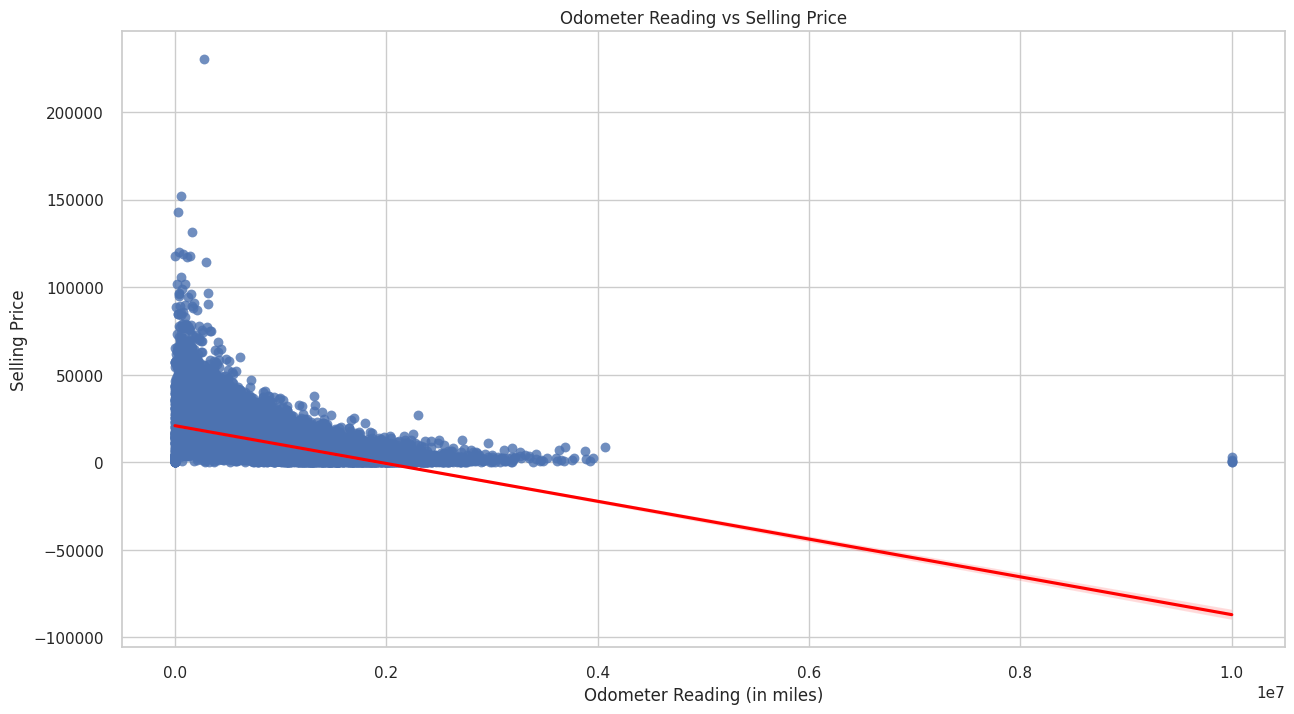

Correlation between Odometer Reading and Selling Price: -0.58


In [ ]:
plt.figure(figsize=(15, 8))
sns.regplot(x='odometer', y='sellingprice', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Odometer Reading vs Selling Price')
plt.xlabel('Odometer Reading (in miles)')
plt.ylabel('Selling Price')
plt.show()
correlation = df['odometer'].corr(df['sellingprice'])
print("Correlation between Odometer Reading and Selling Price: {:.2f}".format(correlation))

**Answer for Q4**: The correlation here is negative, meaning that in this case, as the odometer increases the selling price decreases, as show on the graph.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

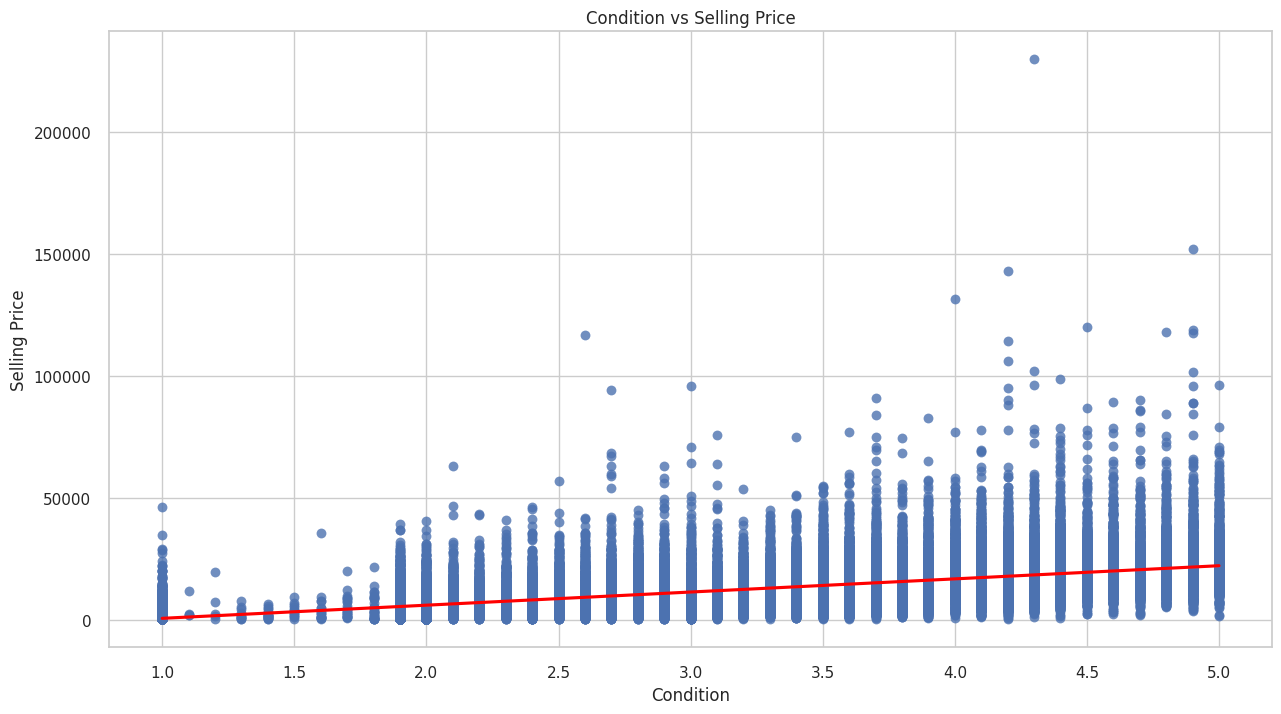

Correlation between Car Condition and Selling Price: 0.53


In [ ]:
plt.figure(figsize=(15, 8))
sns.regplot(x='condition', y='sellingprice', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Condition vs Selling Price')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.show()
correlation_condition_price = df['condition'].corr(df['sellingprice'])
print("Correlation between Car Condition and Selling Price: {:.2f}".format(correlation_condition_price))

**Answer for Q5**: On the contrary the correlation here is positive. As the condition of the car is rated higher, its selling price is higher

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

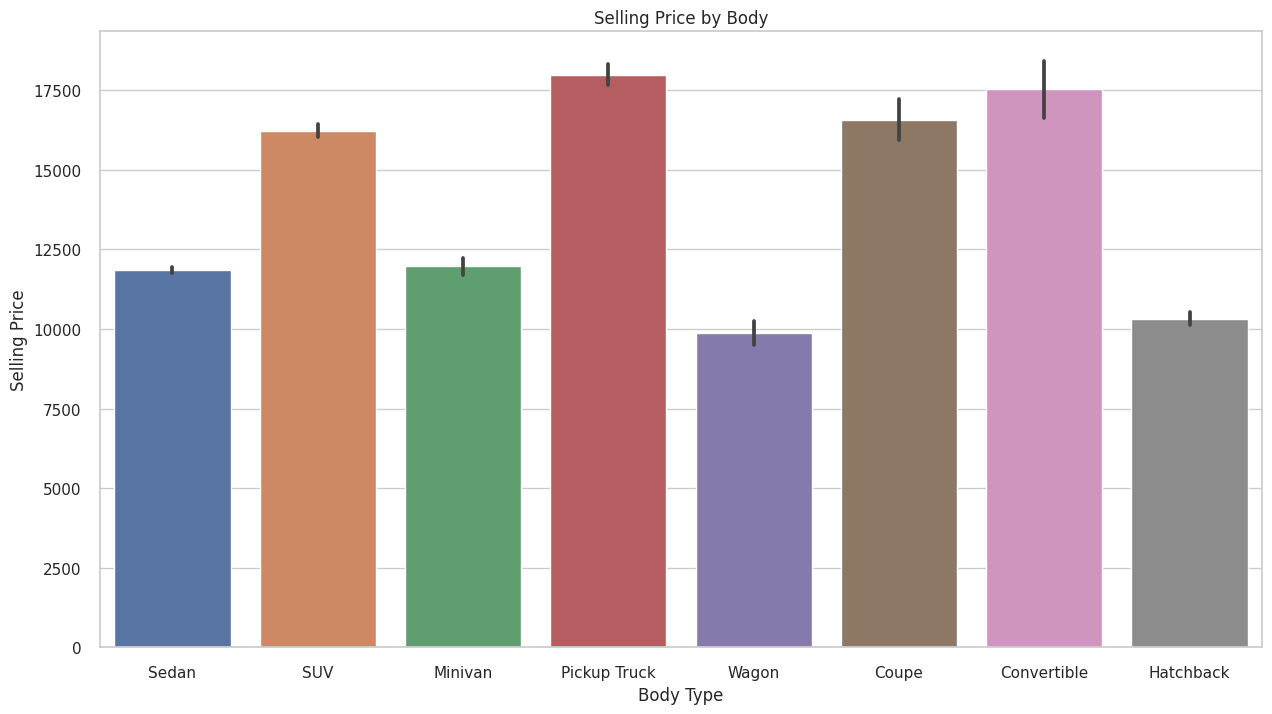

Ranking of Car Body Types by Average Selling Price:
1. Pickup Truck: $17981.77
2. Convertible: $17542.02
3. Coupe: $16561.35
4. SUV: $16221.94
5. Minivan: $11981.05
6. Sedan: $11861.80
7. Hatchback: $10320.64
8. Wagon: $9872.68

Most Expensive Car Body Type: Pickup Truck
Least Expensive Car Body Type: Wagon


In [ ]:
df['sellingprice'] = df['sellingprice'].replace('[\$,]', '', regex=True).astype(int)
plt.figure(figsize=(15, 8))
sns.barplot(x='body', y='sellingprice', data=df)
plt.title('Selling Price by Body')
plt.xlabel('Body Type')
plt.ylabel('Selling Price')
plt.show()
body_type_prices = df.groupby('body')['sellingprice'].mean()
body_type_prices = body_type_prices.sort_values(ascending=False)
print("Ranking of Car Body Types by Average Selling Price:")
for idx, (body_type, avg_price) in enumerate(body_type_prices.items(), start=1):
    print(f"{idx}. {body_type}: ${avg_price:.2f}")
most_expensive_body_type = body_type_prices.index[0]
least_expensive_body_type = body_type_prices.index[-1]
print(f"\nMost Expensive Car Body Type: {most_expensive_body_type}")
print(f"Least Expensive Car Body Type: {least_expensive_body_type}")


**Answer for Q6**: Yes there are differences in the average car price due to the car’s body type. Their order is Convertible, Pickup Truck, Coupe, SUV, Minivan, Sedan, Hatcback and Wagon. The most expensive body car type is convertible, while the least expensive car body type is wagon.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
df.drop('vin',axis=1, inplace=True)
#The vin column is irrelevant to our data and irrelevant to the linear regression in general.
df.drop('saledate',axis=1, inplace=True)
#Sale date column is not needed because the time frame of the sales is not large it all happens within almost the same year.
df.drop('mmr',axis=1, inplace=True)
df.drop('color',axis=1, inplace=True)
#Color of the car will not significantly affect the price of the car and most likely won't change it at all.
df.drop('seller',axis=1, inplace=True)
#The name of the seller is not an important attribute as it affects nothing.
df.drop('state',axis=1, inplace=True)
# The state where the car was auctioned doesn't contribute in the prediction of the selling price.


df

,year,make,model,trim,body,transmission,condition,odometer,interior,sellingprice
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,3.9,504040,gray,10900
1,2014,Toyota,4Runner,SR5,SUV,automatic,4.9,178460,black,29900
2,2012,Lexus,IS 250,Base,Sedan,automatic,4.1,211220,black,24200
3,2002,BMW,X5,4.4i,SUV,automatic,1.9,1453030,black,3200
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,4.9,67140,gray,22100
...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,3.5,528440,gray,17000
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,4.5,231850,black,21500
46575,2013,BMW,3 Series,328i,Sedan,automatic,4.2,453570,beige,22000
46576,2013,Toyota,Camry,LE,Sedan,automatic,3.5,433760,beige,13800


In [ ]:
categorical_columns =  ['make', 'transmission', 'body','model','trim','interior']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)
numerical_columns = ['year', 'odometer', 'condition']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)


df_encode

Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'condition' 'odometer'
 'interior' 'sellingprice']

Number of rows and columns in the dataset: (46578, 10)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer' ... 'interior_tan' 'interior_white'
 'interior_yellow']

Number of rows and columns in the dataset: (46578, 1817)


,year,condition,odometer,sellingprice,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,make_Cadillac,...,interior_gray,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow
0,0.92,0.725,0.050403,10900,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.96,0.975,0.017845,29900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.88,0.775,0.021121,24200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.48,0.225,0.145302,3200,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.96,0.975,0.006713,22100,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,0.92,0.625,0.052843,17000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
46574,0.88,0.875,0.023184,21500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46575,0.92,0.800,0.045356,22000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46576,0.92,0.625,0.043375,13800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

Training dataset size: 37262
Testing dataset size: 9316


## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(x_train, y_train);


In [ ]:
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,2784.400230
1,theta_1,year,25286.135364
2,theta_2,condition,5121.005046
3,theta_3,odometer,-44220.126232
4,theta_4,make_Aston Martin,18637.348319
...,...,...,...
1812,theta_1812,interior_red,2197.002329
1813,theta_1813,interior_silver,-675.301192
1814,theta_1814,interior_tan,-130.013580
1815,theta_1815,interior_white,-1091.712537


## Model Evaluation

_Evaluate the model you applied._

In [ ]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)

The root mean square error (RMSE) is:  3548.3071423555843
R^2 obtained is: 0.8637237601792864


## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The generated value of 0.86 is sufficient since it's not so close to 1 and so not overfitting. (ie) the model is not biased or tailored to our case only. With that being said, this model is reccomended to dealerships.